In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps

from config import (api_key, g_key)

# Configure gmaps
gmaps.configure(api_key=g_key)

In [2]:
# Read the airports.csv and display dataframe
airports_df = pd.read_csv('airports.csv')
airports_df.head()

,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ADK,Adak,Adak,AK,USA,51.877964,-176.646031
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,USA,71.285448,-156.766002
3,BET,Bethel,Bethel,AK,USA,60.779776,-161.837998
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,USA,60.491834,-145.477650


In [3]:
# Rename columns to prepare dataframe for merge
airports_df.rename(columns={"CITY":"City", "IATA":"Code", "AIRPORT":"Airport", "STATE":"State"}, inplace=True)
airports_df.head()

,Code,Airport,City,State,COUNTRY,LATITUDE,LONGITUDE
0,ADK,Adak,Adak,AK,USA,51.877964,-176.646031
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,USA,71.285448,-156.766002
3,BET,Bethel,Bethel,AK,USA,60.779776,-161.837998
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,USA,60.491834,-145.477650


In [4]:
# Read the airport_ratings_passengers.csv and display dataframe
airport_ratings_df = pd.read_csv('airport_ratings_passengers1.csv')
airport_ratings_df.head()

,Unnamed: 0,Airport,Code,Originating Domestic Passengers 10%,Originating Domestic Passengers
0,1,"Los Angeles, CA: Los Angeles International",LAX,"1,564,494",15644940
1,2,"Chicago, IL: Chicago O'Hare International",ORD,"1,266,224",12662240
2,3,"Denver, CO: Denver International",DEN,"1,241,394",12413940
3,4,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",ATL,"1,128,009",11280090
4,5,"Boston, MA: Logan International",BOS,"1,043,353",10433530


In [5]:
# Merge airports_df with airport_ratings_df by "Code"
merged_df=pd.merge(airports_df, airport_ratings_df, on="Code", how="left")
merged_df.head()

,Code,Airport_x,City,State,COUNTRY,LATITUDE,LONGITUDE,Unnamed: 0,Airport_y,Originating Domestic Passengers 10%,Originating Domestic Passengers
0,ADK,Adak,Adak,AK,USA,51.877964,-176.646031,379.0,"Adak Island, AK: Adak",154,1540.0
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186,65.0,"Anchorage, AK: Ted Stevens Anchorage Internati...","123,486",1234860.0
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,USA,71.285448,-156.766002,285.0,"Barrow, AK: Wiley Post/Will Rogers Memorial","2,585",25850.0
3,BET,Bethel,Bethel,AK,USA,60.779776,-161.837998,243.0,"Bethel, AK: Bethel Airport","5,154",51540.0
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,USA,60.491834,-145.477650,333.0,"Cordova, AK: Merle K Mudhole Smith","1,116",11160.0


In [6]:
# Drop the columns that will not use
merged_df.drop(columns=["Unnamed: 0", "Originating Domestic Passengers 10%", "COUNTRY", "Airport_y"], inplace=True)
merged_df.head()

,Code,Airport_x,City,State,LATITUDE,LONGITUDE,Originating Domestic Passengers
0,ADK,Adak,Adak,AK,51.877964,-176.646031,1540.0
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,61.174320,-149.996186,1234860.0
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,71.285448,-156.766002,25850.0
3,BET,Bethel,Bethel,AK,60.779776,-161.837998,51540.0
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,60.491834,-145.477650,11160.0


In [7]:
# Rename the columns of merged_df to have clear headers
merged_df.rename(columns={"Airport_x": "Airport Name", 
                          "LATITUDE":"Lat", 
                          "LONGITUDE":"Lng", 
                          "Originating Domestic Passengers":"Passengers"}, inplace=True)
# merged_df.dropna(how='any')
# merged_df.fillna(value='None',inplace=True)
merged_df

,Code,Airport Name,City,State,Lat,Lng,Passengers
0,ADK,Adak,Adak,AK,51.877964,-176.646031,1540.0
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,61.174320,-149.996186,1234860.0
2,BRW,Wiley Post Will Rogers Memorial,Barrow,AK,71.285448,-156.766002,25850.0
3,BET,Bethel,Bethel,AK,60.779776,-161.837998,51540.0
4,CDV,Merle K (Mudhole) Smith,Cordova,AK,60.491834,-145.477650,11160.0
...,...,...,...,...,...,...,...
336,RKS,Rock Springs-Sweetwater County,Rock Springs,WY,41.594217,-109.065193,14770.0
337,CLD,MC Clellan-Palomar Airport,NaN,NaN,33.127231,-117.278727,NaN
338,MQT,Marquette County Airport,NaN,NaN,46.353639,-87.395361,37450.0
339,SCE,University Park,NaN,NaN,40.851206,-77.846302,112360.0


In [8]:
pssgr = merged_df["Passengers"].replace(',','')
# merged_df = merged_df.Passengers.astype(int)
pd.to_numeric(pssgr, errors="coerce")
merged_df["Passengers"] = pd.to_numeric(pssgr, errors="coerce")

In [9]:
# Create a new dataframe for those airports who have 2,000,000 passengers or more
passengers_over_2mill = merged_df.loc[(merged_df["Passengers"] >= 2000000)]


# Set the index of this new dataframe to be the airports names
passengers_over_2mill = passengers_over_2mill.set_index("Airport Name")

passengers_over_2mill

,Code,City,State,Lat,Lng,Passengers
Airport Name,,,,,,
Phoenix Sky Harbor International,PHX,Phoenix,AZ,33.434167,-112.008056,8160310.0
Los Angeles International,LAX,Los Angeles,CA,33.942536,-118.408074,15644940.0
Metropolitan Oakland International,OAK,Oakland,CA,37.721291,-122.220717,3892480.0
Sacramento International,SMF,Sacramento,CA,38.695422,-121.590767,4050820.0
San Diego International-Lindbergh,SAN,San Diego,CA,32.733556,-117.189657,6533820.0
San Francisco International,SFO,San Francisco,CA,37.619002,-122.374843,10137940.0
San Jose International,SJC,San Jose,CA,37.361862,-121.929009,4384780.0
John Wayne Orange Co,SNA,Santa Ana,CA,33.675659,-117.868223,2873490.0
Denver Intl,DEN,Denver,CO,39.858408,-104.667002,12413940.0


In [10]:
# Set x axis and tick locations
x_axis = np.arange(len(passengers_over_2mill))
tick_locations = [value+0.4 for value in x_axis]

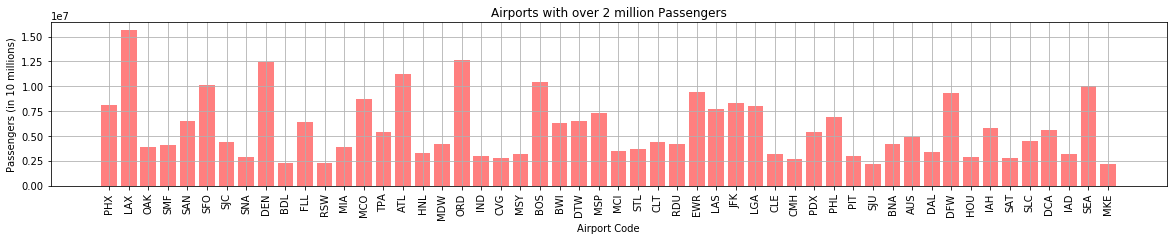

In [11]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, passengers_over_2mill["Passengers"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, passengers_over_2mill["Code"], rotation="vertical")
plt.title("Airports with over 2 million Passengers")
plt.xlabel("Airport Code")
plt.ylabel("Passengers (in 10 millions)")
plt.grid()
plt.show()

In [12]:
# Create Passengers and Codes column into a list
pass_num = passengers_over_2mill["Passengers"].tolist()
airport_codes = passengers_over_2mill["Code"].tolist()

In [13]:
airports_dict = passengers_over_2mill.reset_index().to_dict('records')
airports_dict

[{'Airport Name': 'Phoenix Sky Harbor International',
  'Code': 'PHX',
  'City': 'Phoenix',
  'State': 'AZ',
  'Lat': 33.43416667,
  'Lng': -112.00805559999999,
  'Passengers': 8160310.0},
 {'Airport Name': 'Los Angeles International',
  'Code': 'LAX',
  'City': 'Los Angeles',
  'State': 'CA',
  'Lat': 33.94253611,
  'Lng': -118.40807439999999,
  'Passengers': 15644940.0},
 {'Airport Name': 'Metropolitan Oakland International',
  'Code': 'OAK',
  'City': 'Oakland',
  'State': 'CA',
  'Lat': 37.72129083,
  'Lng': -122.22071670000001,
  'Passengers': 3892480.0},
 {'Airport Name': 'Sacramento International',
  'Code': 'SMF',
  'City': 'Sacramento',
  'State': 'CA',
  'Lat': 38.69542167,
  'Lng': -121.5907669,
  'Passengers': 4050820.0},
 {'Airport Name': 'San Diego International-Lindbergh ',
  'Code': 'SAN',
  'City': 'San Diego',
  'State': 'CA',
  'Lat': 32.73355611,
  'Lng': -117.1896567,
  'Passengers': 6533820.0},
 {'Airport Name': 'San Francisco International',
  'Code': 'SFO',
  'C

In [14]:
# Create a map using state centroid coordinates to set markers
marker_locations = passengers_over_2mill[['Lat', 'Lng']]
amount_passengers = passengers_over_2mill["Passengers"]
airport_by_code = [passengers_over_2mill['Code'] for code in airport_codes]
info_box_template = """
<dl>
<dt>Name</dt><dd>{Code}</dd>
<dt>Number of passengers</dt><dd>{Passengers}</dd>
</dl>
"""

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()

# markers = gmaps.marker_layer(marker_locations,
#     info_box_content=[f"Passengers: {num}" for num in pass_num])
airport_info = [info_box_template.format(**code) for code in airports_dict]

marker_layer = gmaps.marker_layer(marker_locations, info_box_content=airport_info)
fig.add_layer(marker_layer)

# Create heat layer
heat_layer = gmaps.heatmap_layer(marker_locations, weights=amount_passengers, dissipating=False, point_radius=2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))